# Tuning Hyperparameters using Car Data

# Import Data & Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import zipfile
%matplotlib inline

# Project Description

Using the used car prices dataset, I will:

1. Load in “used_car_price.csv” dataset 
3. Split data into 75% for training and 25% for testing 
4. Train an XG-Boost model
5. Assess trained XG-Boost model performance using RMSE and R²  
6. Perform hyperparameters optimization using GridSearch   
8. Compare the optimization strategies using RMSE and R².

# Regression Optimization Using GridSearch

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the CSV file 
car_df = pd.read_csv("used_car_price.csv")

In [4]:
# Load the top 5 instances
car_df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6,225,18,24,3880,115,197


In [5]:
#Get data summary
car_df.describe()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,3.196729,5.799065,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,1.108595,1.559679,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [11]:
# Get general dataframe information
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   EngineSize   428 non-null    float64
 7   Cylinders    428 non-null    int64  
 8   Horsepower   428 non-null    int64  
 9   MPG_City     428 non-null    int64  
 10  MPG_Highway  428 non-null    int64  
 11  Weight       428 non-null    int64  
 12  Wheelbase    428 non-null    int64  
 13  Length       428 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 46.9+ KB


In [ ]:
# Set graphics preferences
colors = sns.color_palette('pastel') # Color palette
sns.set(rc={'figure.figsize':(8,6)})

# Axes & label font size
plt.rc('axes', titlesize=18)     
plt.rc('axes', labelsize=14)

# Tick & label fontsize
plt.rc('xtick', labelsize=13)  
plt.rc('ytick', labelsize=13)    
plt.rc('legend', fontsize=13)    
plt.rc('font', size=13)

# darkgrid, white grid, dark, white and ticks
sns.set_style('white') 

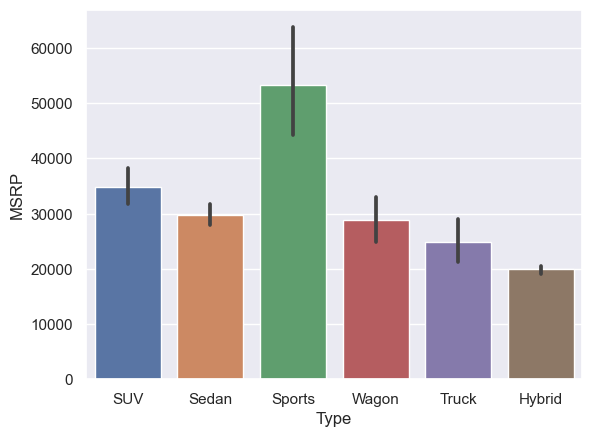

In [9]:
# Plot different Car types
sns.barplot(data=car_df, x='Type', y='MSRP');

In [109]:
# Create dummies for "Make", "Model", "Type", "Origin", and "DriveTrain"
car_df = pd.get_dummies(car_df, columns=["Make", "Model", "Type", "Origin", "DriveTrain"])

In [110]:
# Feeding input features to X and output (MSRP) to y
X = car_df.drop("MSRP", axis = 1)
y = car_df["MSRP"]

In [111]:
# Convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y)

In [113]:
#Create test data using 25% from sample
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.25)

In [114]:
X_train

array([[  3.2,   6. , 215. , ...,   0. ,   0. ,   1. ],
       [  2.2,   4. , 140. , ...,   0. ,   1. ,   0. ],
       [  3.2,   6. , 290. , ...,   0. ,   0. ,   1. ],
       ...,
       [  2.6,   6. , 168. , ...,   1. ,   0. ,   0. ],
       [  6.8,  10. , 310. , ...,   1. ,   0. ,   0. ],
       [  3.2,   6. , 221. , ...,   0. ,   0. ,   1. ]])

In [115]:
X_test

array([[  4.7,   8. , 235. , ...,   1. ,   0. ,   0. ],
       [  2.4,   4. , 150. , ...,   0. ,   1. ,   0. ],
       [  4.6,   8. , 224. , ...,   0. ,   0. ,   1. ],
       ...,
       [  4.3,   8. , 300. , ...,   0. ,   0. ,   1. ],
       [  3. ,   6. , 225. , ...,   0. ,   0. ,   1. ],
       [  3. ,   6. , 220. , ...,   0. ,   1. ,   0. ]])

In [116]:
# Initialize XGBoost model
!pip install xgboost
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 1, max_depth = 3, n_estimators = 500)

#Fit model on training data
model.fit(X_train, y_train)

# Make predictions on the test data using the text regressors
y_predict = model.predict(X_test)

# Import metrics to evaluate the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

#Assess Model Performance
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE,'\nR2 =', r2) 


RMSE = 8540.773 
R2 = 0.7953782827504423


In [117]:
#Use XG-Boost with Gridsearch to optimize estimate
#Use 5 cross validation folds and 100 iterations
from sklearn.model_selection import GridSearchCV
#Select parameters
#Max Depth: I want to compensate bewteen capctuing the complexity of data while avoiding overfitting so I 
# set a floor of 3 and ceiling of 20
#Learning Rate: I compare a more conservative learning rate/eta (0.1), which will require more estimators, 
#with a more aggressive rate (0.5) that converges faster but can lead to overfitting.
#n_estimators: I chose of 100 - 500 trees or decision rounds to compare.
#colsample_bytree: I chose the ratio 3:7 to contrast low to high shares of columns(features_ being sampled)
parameters_grid = { 'max_depth': [3, 10, 20], 
                   'learning_rate': [0.1, 0.5],
                   'n_estimators': [100, 500],
                   'colsample_bytree': [0.3, 0.7]}

model = xgb.XGBRegressor()

#"neg_mean_squared_error" ranks all the estimators and specifies which one is the best to minimize the error.  
xgb_gridsearch = GridSearchCV(estimator = model, 
                              param_grid = parameters_grid, 
                              scoring = 'neg_mean_squared_error',  
                              cv = 5, 
                              verbose = 5)

#Fit model on training data
xgb_gridsearch.fit(X_train, y_train)

# Make predictions on the test data using the text regressors
y_predict = xgb_gridsearch.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

#Assess Model Performance
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE,'\nR2 =', r2) 


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100;, score=-47875344.185 total time=   0.0s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100;, score=-227604528.843 total time=   0.0s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100;, score=-28767924.871 total time=   0.0s
[CV 4/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100;, score=-44624157.233 total time=   0.0s
[CV 5/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100;, score=-54761345.646 total time=   0.0s
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500;, score=-44902549.329 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500;, score=-214404414.393 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.1, max_dep

## Discussion

The RMSE decreased significantly from 8540.773 to 5445.641 after applying hyperparameter tuning. This reduction of approximately 36.2% suggests that the latest model is more accurate in its predictions. Additionally, the R² increased from 0.795 to 0.917, indicating that the new GridsearchCV + XGBoost model explains about 92% of the variance in car prices, compared to 79.5% explained by the XGBoost model. 

## Works Cited
Harode, Rohan. “XGBoost: A Deep Dive into Boosting.” Medium, SFU Professional Computer Science, 23 Apr. 2020, medium.com/sfu-cspmp/xgboost-a-deep-dive-into-boosting-f06c9c41349. 